# Finance Data Project

In this data project I focused on exploratory data analysis of stock prices of Yelp and compared with stock prices of Google, Facebook, and JPMorgan. 
I focused on stocks progression throughout the IPO of Yelp March 2012 to December 2018.

This project inspired by *Python for Data Science and Machine Learning Bootcamp, Udemy*, taught by Jose Portilla

## Get the Data

Pandas was used to directly read data from Yahoo finance!

First thing to do is to import necessary modules.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**)*



In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following companies:
* Yelp
* Google
* Facebook
* JPMorgan Chase

** Key steps to consider:**
1. Use datetime to set start and end datetime objects.
2. Determine ticker symbol for each company.
2. Use datareader to grab details on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for details and instructions:**


In [2]:
#initialize the start and end parameter
start = datetime.datetime(2012, 3, 2)
end = datetime.datetime(2018, 12, 24)

In [3]:
# Yelp
YELP = data.DataReader("YELP", 'yahoo', start, end)

# Google
GOOGL = data.DataReader("GOOGL", 'yahoo', start, end)

# Facebook
FB = data.DataReader("FB", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)


# Conccatinate data to dataframe
tickers = "YELP GOOGL FB JPM"
tickers=tickers.split()

df = pd.concat([YELP,GOOGL,FB,JPM], axis=1,keys=tickers)


In [4]:
# Could also do this for a Panel Object
#df = data.DataReader(['YELP', 'GOOGL', 'FB', 'JPM'],'yahoo', start, end)
df.head()

YELP                                                  \
                 High        Low       Open  Close   Volume Adj Close   
Date                                                                    
2012-03-02  26.000000  22.000000  22.010000  24.58  4809400     24.58   
2012-03-05  24.860001  20.900000  24.850000  20.99  2988200     20.99   
2012-03-06  20.500000  19.360001  19.830000  20.50  1154300     20.50   
2012-03-07  20.629999  19.950001  20.450001  20.25   444800     20.25   
2012-03-08  20.389999  19.959999  20.299999  20.00   436900     20.00   

                 GOOGL                                        ...       FB  \
                  High         Low        Open       Close    ...     Open   
Date                                                          ...            
2012-03-02  312.312317  310.470459  311.311310  310.935944    ...      NaN   
2012-03-05  311.556549  305.996002  310.525513  307.432434    ...      NaN   
2012-03-06  304.709717  297.217224  304.329315  302.782776    ...      NaN   
2012-03-07  305.900909  303.233246  304.829834  303.703705    ...      NaN   
2012-03-08  306.056061  303.478485  305.325317  303.873871    ...      NaN   

                                         JPM                                   \
           Close Volume Adj Close       High        Low       Open      Close   
Date                                                                            
2012-03-02   NaN    NaN       NaN  40.880001  40.230000  40.430000  40.630001   
2012-03-05   NaN    NaN       NaN  40.709999  40.000000  40.700001  40.400002   
2012-03-06   NaN    NaN       NaN  39.869999  39.119999  39.450001  39.320000   
2012-03-07   NaN    NaN       NaN  40.060001  39.380001  39.459999  39.950001   
2012-03-08   NaN    NaN       NaN  40.750000  40.220001  40.470001  40.439999   

                                   
                Volume  Adj Close  
Date                               
2012-03-02  34897900.0  33.831562  
2012-03-05  30806900.0  33.640057  
2012-03-06  33927500.0  32.740757  
2012-03-07  22875100.0  33.265347  
2012-03-08  22052300.0  33.673359  

[5 rows x 24 columns]

** Set the column name levels:**

In [5]:
df.columns.names = ['Corp. Ticker','Stock Info']

** Check the head of the Corp. dataframe.**

In [6]:
df.head()

Corp. Ticker       YELP                                                  \
Stock Info         High        Low       Open  Close   Volume Adj Close   
Date                                                                      
2012-03-02    26.000000  22.000000  22.010000  24.58  4809400     24.58   
2012-03-05    24.860001  20.900000  24.850000  20.99  2988200     20.99   
2012-03-06    20.500000  19.360001  19.830000  20.50  1154300     20.50   
2012-03-07    20.629999  19.950001  20.450001  20.25   444800     20.25   
2012-03-08    20.389999  19.959999  20.299999  20.00   436900     20.00   

Corp. Ticker       GOOGL                                        ...       FB  \
Stock Info          High         Low        Open       Close    ...     Open   
Date                                                            ...            
2012-03-02    312.312317  310.470459  311.311310  310.935944    ...      NaN   
2012-03-05    311.556549  305.996002  310.525513  307.432434    ...      NaN   
2012-03-06    304.709717  297.217224  304.329315  302.782776    ...      NaN   
2012-03-07    305.900909  303.233246  304.829834  303.703705    ...      NaN   
2012-03-08    306.056061  303.478485  305.325317  303.873871    ...      NaN   

Corp. Ticker                               JPM                        \
Stock Info   Close Volume Adj Close       High        Low       Open   
Date                                                                   
2012-03-02     NaN    NaN       NaN  40.880001  40.230000  40.430000   
2012-03-05     NaN    NaN       NaN  40.709999  40.000000  40.700001   
2012-03-06     NaN    NaN       NaN  39.869999  39.119999  39.450001   
2012-03-07     NaN    NaN       NaN  40.060001  39.380001  39.459999   
2012-03-08     NaN    NaN       NaN  40.750000  40.220001  40.470001   

Corp. Ticker                                    
Stock Info        Close      Volume  Adj Close  
Date                                            
2012-03-02    40.630001  34897900.0  33.831562  
2012-03-05    40.400002  30806900.0  33.640057  
2012-03-06    39.320000  33927500.0  32.740757  
2012-03-07    39.950001  22875100.0  33.265347  
2012-03-08    40.439999  22052300.0  33.673359  

[5 rows x 24 columns]

# EDA

Determine the max Close price for each Corp during the time frame?

In [7]:
df.xs(key='Close',axis=1,level='Stock Info').max()

Corp. Ticker
YELP       98.040001
GOOGL    1285.500000
FB        217.500000
JPM       118.769997
dtype: float64

In [8]:
# or using a loop:
for ticks in tickers:
    print(ticks,df[ticks]['Close'].max())

YELP 98.04000091552734
GOOGL 1285.5
FB 217.5
JPM 118.7699966430664


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a column representing this return value.**

In [9]:
returns = pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick+' Return'] = df[tick]['Close'].pct_change()
returns.head()

YELP Return  GOOGL Return  FB Return  JPM Return
Date                                                        
2012-03-02          NaN           NaN        NaN         NaN
2012-03-05    -0.146054     -0.011268        NaN   -0.005661
2012-03-06    -0.023344     -0.015124        NaN   -0.026733
2012-03-07    -0.012195      0.003042        NaN    0.016022
2012-03-08    -0.012346      0.000560        NaN    0.012265

** Create a pairplot using seaborn of the returns dataframe.**

C:\Users\takko\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\takko\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


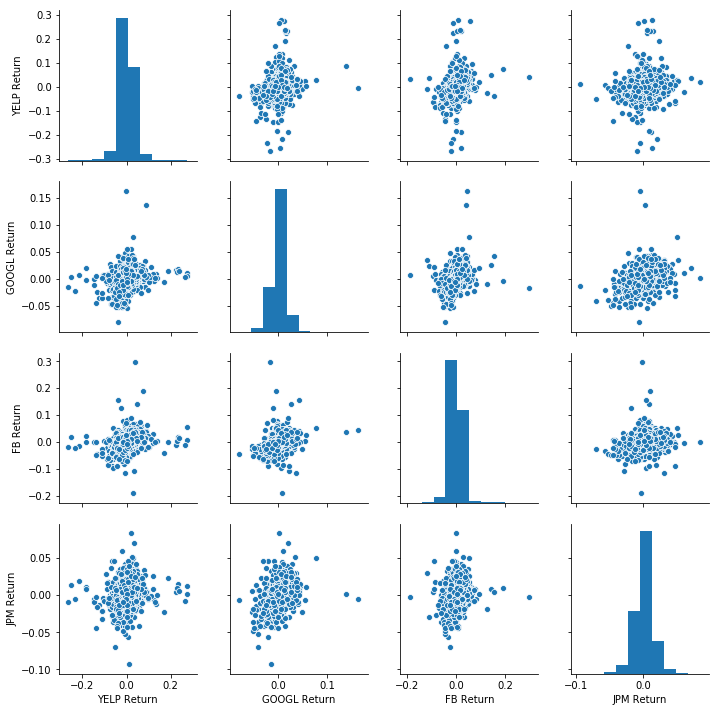

In [11]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

** Using this returns DataFrame, determine on what dates each Corp. stock had the best and worst single day returns?**

In [12]:
# Worst Drop (2 of them were late 2018)
returns.idxmin()

YELP Return    2018-11-09
GOOGL Return   2012-10-18
FB Return      2018-07-26
JPM Return     2012-05-11
dtype: datetime64[ns]

[Yelp's advertisers abandon site after revenue falls short of estimates.](https://www.cnbc.com/2018/11/09/yelp-craters-30percent-as-advertisers-abandon-the-site.html)

In [13]:
# Best Single Day Gain
returns.idxmax()

YELP Return    2017-08-04
GOOGL Return   2015-07-17
FB Return      2013-07-25
JPM Return     2016-02-12
dtype: datetime64[ns]

** Taking a look at the standard deviation of the returns, Yelp stock would be classified as the riskiest over the entire time period?**

In [14]:
returns.std() # Yelp is riskiest

YELP Return     0.036923
GOOGL Return    0.014371
FB Return       0.023419
JPM Return      0.013709
dtype: float64

In [15]:
returns.loc['2018-01-01':'2018-12-23'].std() # Very similar risk profiles for Yelp returns of 2018

YELP Return     0.034105
GOOGL Return    0.017459
FB Return       0.023603
JPM Return      0.013665
dtype: float64

** Distplot using seaborn of the 2018 returns for Yelp **

C:\Users\takko\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


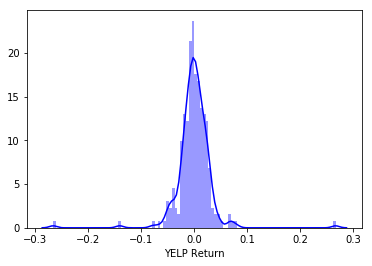

In [16]:
sns.distplot(returns.loc['2018-01-01':'2018-12-23']['YELP Return'],color='blue',bins=100)

** Distplot using seaborn of the 2008 returns for Facebook **

C:\Users\takko\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


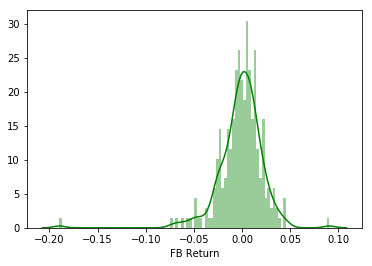

In [17]:
sns.distplot(returns.loc['2018-01-01':'2018-12-23']['FB Return'],color='green',bins=100)

____
# Enhanced Visualizations!


### Imports

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import plotly.graph_objs as go
from plotly.offline import *
import cufflinks as cf
 
# import plotly.graph_objs as go
cf.go_offline()


** Line plot showing Close price for each Corp. stocks for the entire index of time. Using either a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

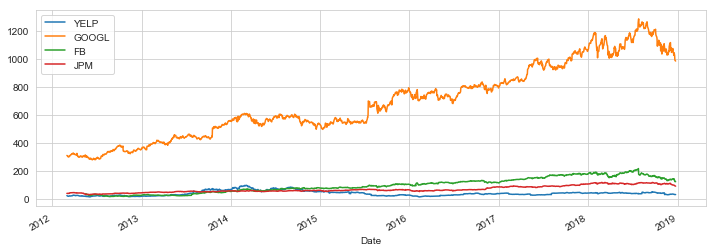

In [19]:
for tick in tickers:
    df[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend()
plt.ylabel= 'Closing Price(USD)'
plt.title= 'title'
plt.show()

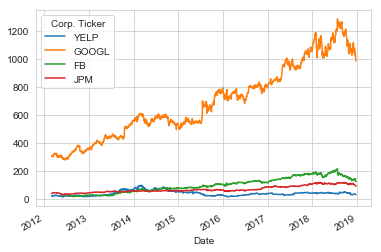

In [20]:
df.xs(key='Close',axis=1,level='Stock Info').plot()

In [21]:
# use plotly to make the figure look nice and interactive 

df2 = df.xs(key='Close',axis=1,level='Stock Info').reset_index()

Yelp = go.Scatter(name = 'YELP', x=df2['Date'], y = df2["YELP"])
Google = go.Scatter(name = 'Google', x=df2['Date'], y = df2["GOOGL"])
Facebook = go.Scatter(name = 'Facebook', x=df2['Date'], y = df2["FB"])
JPMorgan = go.Scatter(name = 'JP Morgan', x=df2['Date'], y = df2["JPM"])

xaxis_temp = dict(title = 'Date')
yaxis_temp = dict(title = 'Closing Price (USD)')

layout = go.Layout(title = '<b>Stock Closing Prices of YELP from IPO to Present <br> Compared With Top Tech Company and JPMorgan</b>', 
                   xaxis = xaxis_temp, yaxis = yaxis_temp)

data = [Yelp,Google,Facebook,JPMorgan]

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)



In [22]:
df.xs(key='Close',axis=1,level='Stock Info').iplot()

##  Plotting Moving Averages

Let's analyze the moving averages for these stocks in the year 2018. 

** Rolling 30 day average against the Close Price for Yelp's stock for the year 2018 **

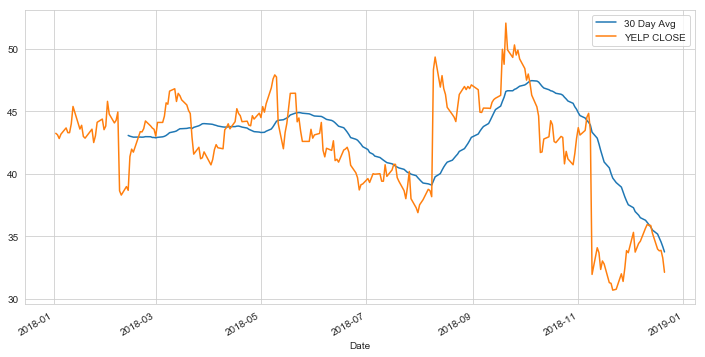

In [23]:
plt.figure(figsize=(12,6))
YELP['Close'].loc['2018-01-01':'2018-12-23'].rolling(window=30).mean().plot(label='30 Day Avg')
YELP['Close'].loc['2018-01-01':'2018-12-23'].plot(label='YELP CLOSE')
plt.legend()


** Heatmap of the correlation between the stocks Close Price.**

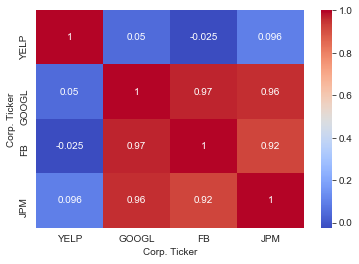

In [24]:
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(), cmap = 'coolwarm', annot=True)
#YELP's closing price is not correlated with other Corps. 

** Seaborn's clustermap to cluster the correlations together:**

*note similar to correlation data above, seaborn's clustering algorithm removes Yelp from other Corps.


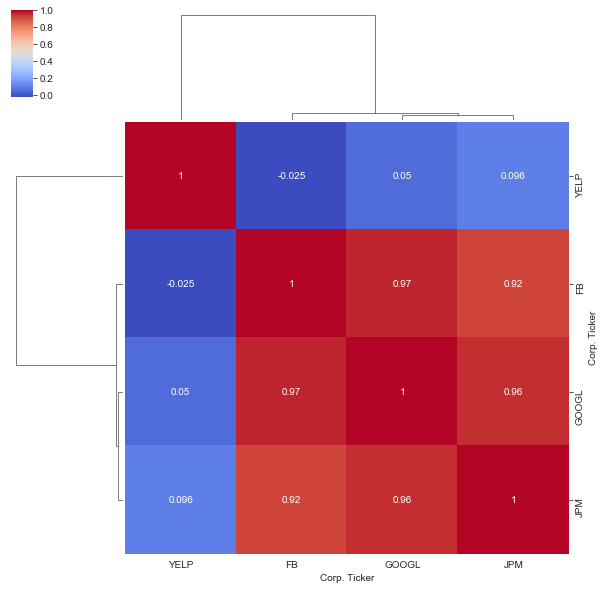

In [25]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(), cmap='coolwarm', annot=True)

In [26]:
close_corr = df.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Conclusion

From examining the data, we were able to gain insights regarding Yelp's stock from 2012-03-02 to present. Notably, despite the initially high IPO, Yelp's stock prices fluctuation did not correlate with the tech industry (data compared with FB and Google as controls) nor the economy(data compared with JPMorgan Chase). In addition, when comparing Yelp's overall stock prices with Yelp news, no real trends were observed for the sharp increase and overall decrease of their stock prices. One hypothesis, despite their incorporation of useful new features (i.e. in app online reservation,request a quote, bookmark collections), of their overall low stock prices may be caused by bad PR from their countless litigations with restaurant owners that claim they were extorted by raising or dropping restaurant ratings if they opt out of advertising on Yelp (no such evidence of any wrong doing by Yelp has been determined by the court system as of writing this article). 

Other sources such as [eater.com](https://www.eater.com/2018/11/16/18094979/yelp-stock-plunge-future-viability-competition-google-instagram-twitter.html) suggests the downfall of Yelp may be attributed to fierce competition by Google and/or Instagram as an alterantive host for their advertisement.

As an avid Yelp user, I hope their business will return to be valued as high as its competitors and continue providing a platform that allow users to voice their opinion for the search of the best restaurant experience.

-Tak Koyanagi
